# Prioridade de Reposição de Produtos no BuonoPreço

**Contexto aplicado:**
- O supermercado BuonoPreço deseja automatizar a reposição de produtos com base em dois fatores:
  - O nível atual de estoque.
  - A taxa de venda do produto nos últimos dias.
- O objetivo é priorizar corretamente os produtos mais críticos, evitando rupturas ou excesso de estoque.

### Instalação do scikit-fuzzy (se necessário)

Pip:
```
pip install scikit-fuzzy
```


In [23]:
# Na primeira execução, instale o scikit-fuzzy. Basta descomentar a linha abaixo.
#!pip install -U scikit-fuzzy

### Variáveis linguísticas e funções de pertinências

O BuonoPreço deseja automatizar a decisão de quais produtos devem ser repostos com maior prioridade, com base em:

- Nível de Estoque (baixa, média, alta)
- Taxa de Venda (lenta, média, rápida)

A saída será uma prioridade de reposição (baixa, média, alta).

/opt/homebrew/Caskroom/miniconda/base/envs/gpuTorch/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


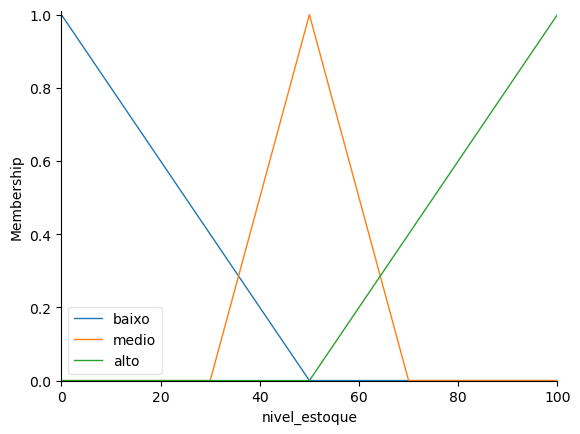

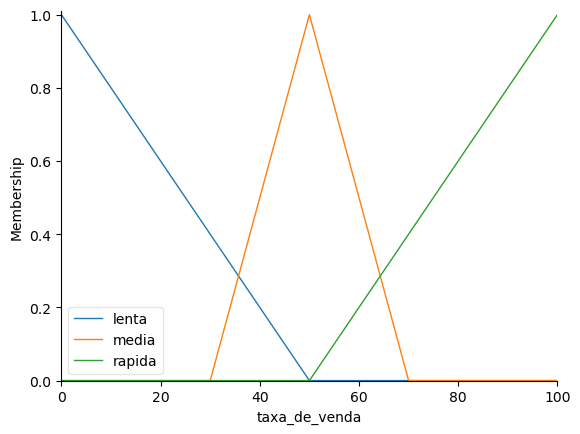

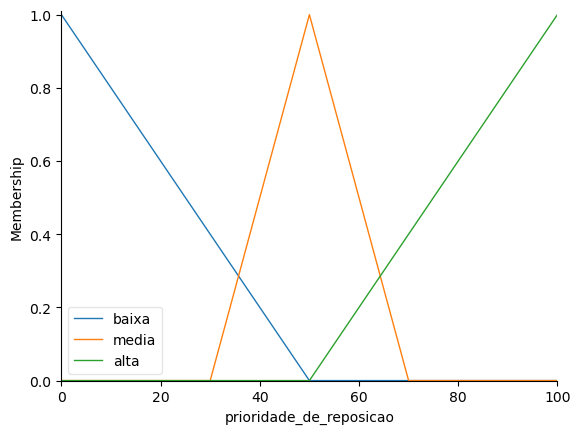

In [1]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definindo as variáveis de entrada e saída
nivel_estoque = ctrl.Antecedent(np.arange(0, 101, 1), 'nivel_estoque')
taxa_de_venda = ctrl.Antecedent(np.arange(0, 101, 1), 'taxa_de_venda')
prioridade_de_reposicao = ctrl.Consequent(np.arange(0, 101, 1), 'prioridade_de_reposicao')

# Funções de pertinência para o nível de estoque
nivel_estoque['baixo'] = fuzz.trimf(nivel_estoque.universe, [0, 0, 50])
nivel_estoque['medio'] = fuzz.trimf(nivel_estoque.universe, [30, 50, 70])
nivel_estoque['alto'] = fuzz.trimf(nivel_estoque.universe, [50, 100, 100])

# Funções de pertinência para a taxa de venda
taxa_de_venda['lenta'] = fuzz.trimf(taxa_de_venda.universe, [0, 0, 50])
taxa_de_venda['media'] = fuzz.trimf(taxa_de_venda.universe, [30, 50, 70])
taxa_de_venda['rapida'] = fuzz.trimf(taxa_de_venda.universe, [50, 100, 100])

# Funções de pertinência para a prioridade de reposição
prioridade_de_reposicao['baixa'] = fuzz.trimf(prioridade_de_reposicao.universe, [0, 0, 50])
prioridade_de_reposicao['media'] = fuzz.trimf(prioridade_de_reposicao.universe, [30, 50, 70])
prioridade_de_reposicao['alta'] = fuzz.trimf(prioridade_de_reposicao.universe, [50, 100, 100])

# Visualização (opcional)
nivel_estoque.view()
taxa_de_venda.view()
prioridade_de_reposicao.view()


### Regras Fuzzy do Sistema de Reposição BuonoPreço

As regras a seguir determinam a **prioridade de reposição** de um produto com base no **nível de estoque** atual e na **taxa de venda** observada:

1. **SE** o nível de estoque é **baixo** **E** a taxa de venda é **rápida**, **ENTÃO** a prioridade de reposição é **alta**.
2. **SE** o nível de estoque é **baixo** **E** a taxa de venda é **média**, **ENTÃO** a prioridade de reposição é **alta**.
3. **SE** o nível de estoque é **baixo** **E** a taxa de venda é **lenta**, **ENTÃO** a prioridade de reposição é **média**.
4. **SE** o nível de estoque é **médio** **E** a taxa de venda é **rápida**, **ENTÃO** a prioridade de reposição é **alta**.
5. **SE** o nível de estoque é **médio** **E** a taxa de venda é **média**, **ENTÃO** a prioridade de reposição é **média**.
6. **SE** o nível de estoque é **médio** **E** a taxa de venda é **lenta**, **ENTÃO** a prioridade de reposição é **baixa**.
7. **SE** o nível de estoque é **alto** **E** a taxa de venda é **rápida**, **ENTÃO** a prioridade de reposição é **média**.
8. **SE** o nível de estoque é **alto** **E** a taxa de venda é **média**, **ENTÃO** a prioridade de reposição é **baixa**.
9. **SE** o nível de estoque é **alto** **E** a taxa de venda é **lenta**, **ENTÃO** a prioridade de reposição é **baixa**.

In [2]:
# Regras fuzzy
regra1 = ctrl.Rule(nivel_estoque['baixo'] & taxa_de_venda['rapida'], prioridade_de_reposicao['alta'])
regra2 = ctrl.Rule(nivel_estoque['baixo'] & taxa_de_venda['media'], prioridade_de_reposicao['alta'])
regra3 = ctrl.Rule(nivel_estoque['baixo'] & taxa_de_venda['lenta'], prioridade_de_reposicao['media'])
regra4 = ctrl.Rule(nivel_estoque['medio'] & taxa_de_venda['rapida'], prioridade_de_reposicao['alta'])
regra5 = ctrl.Rule(nivel_estoque['medio'] & taxa_de_venda['media'], prioridade_de_reposicao['media'])
regra6 = ctrl.Rule(nivel_estoque['medio'] & taxa_de_venda['lenta'], prioridade_de_reposicao['baixa'])
regra7 = ctrl.Rule(nivel_estoque['alto'] & taxa_de_venda['rapida'], prioridade_de_reposicao['media'])
regra8 = ctrl.Rule(nivel_estoque['alto'] & taxa_de_venda['media'], prioridade_de_reposicao['baixa'])
regra9 = ctrl.Rule(nivel_estoque['alto'] & taxa_de_venda['lenta'], prioridade_de_reposicao['baixa'])

# Sistema de controle e simulação
controle_de_reabastecimento = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
simulacao_de_reabastecimento = ctrl.ControlSystemSimulation(controle_de_reabastecimento)


Prioridade calculada para reposição: 60.16199376947047


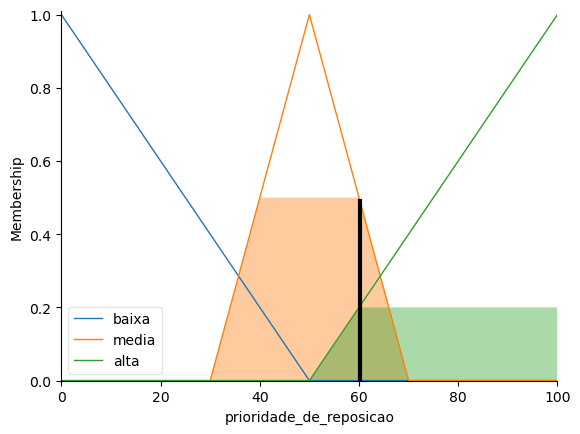

In [3]:
# Exemplo de entrada
simulacao_de_reabastecimento.input['nivel_estoque'] = 45  # estoque baixo
simulacao_de_reabastecimento.input['taxa_de_venda'] = 60  # vendas rápidas

# Processar
simulacao_de_reabastecimento.compute()
print("Prioridade calculada para reposição:", simulacao_de_reabastecimento.output['prioridade_de_reposicao'])

# Visualização do resultado
prioridade_de_reposicao.view(sim=simulacao_de_reabastecimento)
plt.show()


In [4]:
# Simulação em lote de produtos com base em estoque e taxa de venda
produtos = [
    {"descricao": "Arroz 5kg", "preco": 22.90, "estoque": 30, "estoque_max": 100, "vendas_dia_anterior": 12, "vendas_semana": 70},
    {"descricao": "Feijão 1kg", "preco": 7.50, "estoque": 10, "estoque_max": 80, "vendas_dia_anterior": 9, "vendas_semana": 60},
    {"descricao": "Café 500g", "preco": 14.20, "estoque": 50, "estoque_max": 80, "vendas_dia_anterior": 6, "vendas_semana": 30},
    {"descricao": "Sabão 1kg", "preco": 8.90, "estoque": 70, "estoque_max": 100, "vendas_dia_anterior": 3, "vendas_semana": 15},
    {"descricao": "Leite 1L", "preco": 4.79, "estoque": 20, "estoque_max": 100, "vendas_dia_anterior": 20, "vendas_semana": 130},
]

resultado_prioridades = []

for produto in produtos:
    # Cálculo da taxa de venda normalizada (média ponderada do dia e da semana)
    taxa_venda = (produto['vendas_dia_anterior'] * 0.4 + produto['vendas_semana'] * 0.6)
    taxa_venda = min(100, taxa_venda)  # normalização simples para 0 a 100

    # Cálculo do nível de estoque relativo
    nivel_estoque = 100 * (produto['estoque'] / produto['estoque_max'])

    # Simulação
    simulacao_de_reabastecimento.input['nivel_estoque'] = nivel_estoque
    simulacao_de_reabastecimento.input['taxa_de_venda'] = taxa_venda
    simulacao_de_reabastecimento.compute()

    prioridade = simulacao_de_reabastecimento.output['prioridade_de_reposicao']
    resultado_prioridades.append({
        "descricao": produto['descricao'],
        "prioridade": prioridade,
        "estoque_atual": produto['estoque'],
        "vendas_dia_anterior": produto['vendas_dia_anterior'],
        "vendas_semana": produto['vendas_semana']
    })

# Ordenar e exibir
resultado_ordenado = sorted(resultado_prioridades, key=lambda x: x['prioridade'], reverse=True)

print("Ranking de prioridade de reposição:\n")
for item in resultado_ordenado:
    print(f"{item['descricao']}: \t Prioridade = {item['prioridade']:.2f} \t | \t Estoque = {item['estoque_atual']} \t | \t Vendas Semanais = {item['vendas_semana']}")

Ranking de prioridade de reposição:

Leite 1L: 	 Prioridade = 81.43 	 | 	 Estoque = 20 	 | 	 Vendas Semanais = 130
Arroz 5kg: 	 Prioridade = 76.61 	 | 	 Estoque = 30 	 | 	 Vendas Semanais = 70
Feijão 1kg: 	 Prioridade = 72.74 	 | 	 Estoque = 10 	 | 	 Vendas Semanais = 60
Café 500g: 	 Prioridade = 20.67 	 | 	 Estoque = 50 	 | 	 Vendas Semanais = 30
Sabão 1kg: 	 Prioridade = 20.42 	 | 	 Estoque = 70 	 | 	 Vendas Semanais = 15
